In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import necesseray libraries


## Define the functions here

In [78]:
# Define functions as per the instructions
def linear_function(x):
    return 3 * x + 1

def quadratic_function(x):
    return 5 * x**2 + 3 * x + 1

def cubic_function(x):
    return 7 * x**3 + 5 * x**2 + 3 * x + 1


In [79]:
# Data generation function
def data_generation(function, batch_s=256, x_range=(-50, 50)):
    data = []
    x = np.random.randn(batch_s)  # Uniformly distributed inputs
    for i in range(batch_s):
        y = function(x[i])
        data.append([x[i], y])
    return torch.FloatTensor(data)

# Normalize and denormalize functions
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val) * 2 - 1

def denormalize(data, min_val, max_val):
    return (data + 1) / 2 * (max_val - min_val) + min_val

# Plot real data
def plot_real_data(function, title, x_range=(-50, 50)):
    data = data_generation(function, batch_s=5000, x_range=x_range)
    x = data[:, 0].numpy()
    y = data[:, 1].numpy()
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Real Data", color="orange", alpha=0.6)
    plt.title(title)
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    plt.legend()
    plt.show()

## Defining generator and discriminator class

In [80]:
class Generator(nn.Module):
    def __init__(self, latent_dim, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, z, x):
        combined = torch.cat((z, x), dim=1)
        return self.model(combined)

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

## train the GAN

In [81]:
def train_gan(generator, discriminator, function, epochs=10000, batch_size=256, x_range=(-50, 50), lr=0.0002):
    g_optimizer = optim.Adam(generator.parameters(), lr=lr)
    d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
    criterion = nn.BCELoss()

    for epoch in range(epochs):
        # Generate real data
        real_data = data_generation(function, batch_s=batch_size, x_range=x_range)
        x_real = real_data[:, 0].unsqueeze(1)  # Inputs
        y_real = real_data[:, 1].unsqueeze(1)  # Outputs

        # Generate fake data
        z_fake = torch.randn(batch_size, 5)  # Latent space
        y_fake = generator(z_fake, x_real)
        fake_data = torch.cat((x_real, y_fake), dim=1)

        # Train discriminator
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        d_loss_real = criterion(discriminator(real_data), real_labels)
        d_loss_fake = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train generator
        g_loss = criterion(discriminator(fake_data), real_labels)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


## Plot the results for linear quadratic and cubic functions

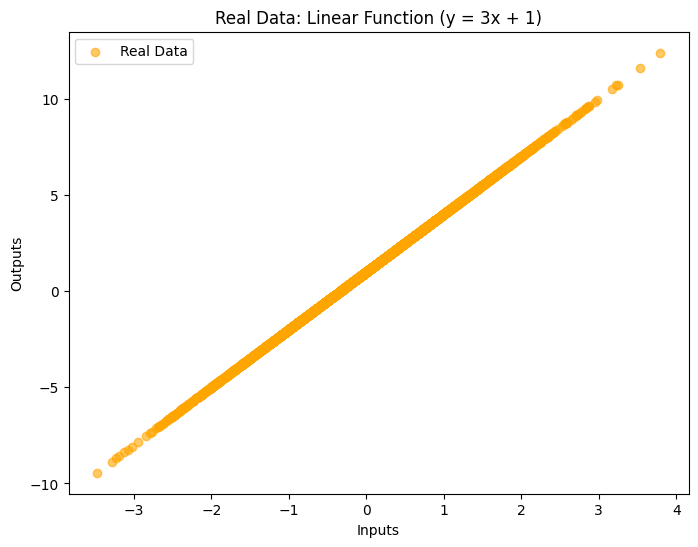

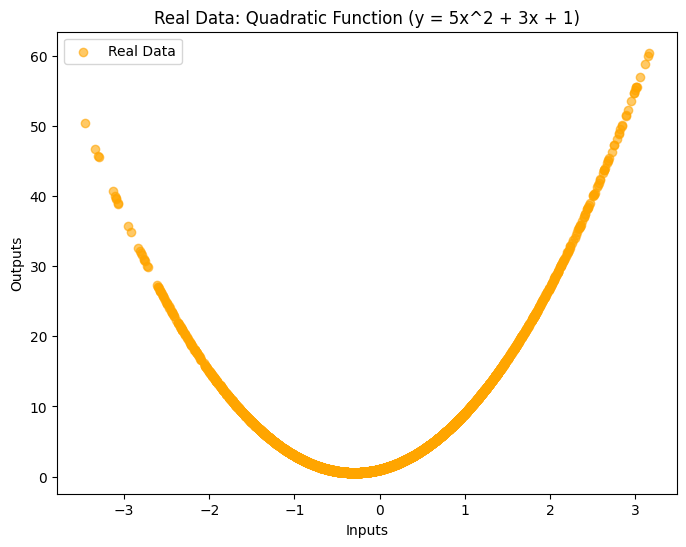

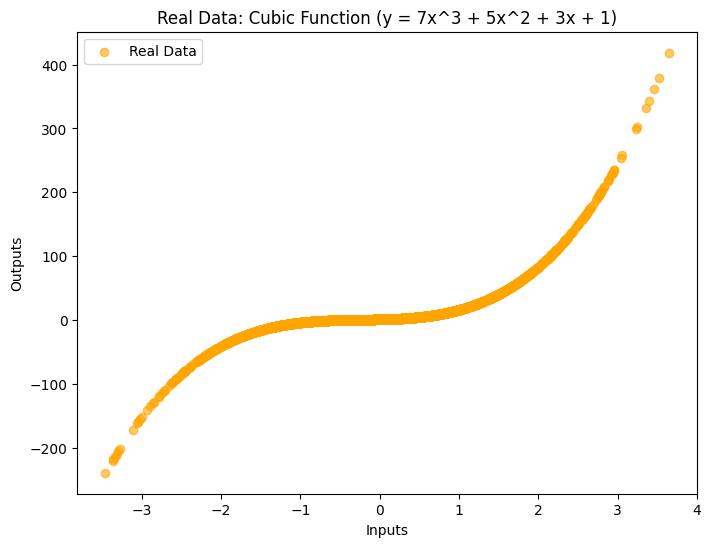

Epoch 0/10000, D Loss: 1.4147, G Loss: 0.7268
Epoch 1000/10000, D Loss: 1.3713, G Loss: 0.6964
Epoch 2000/10000, D Loss: 1.3761, G Loss: 0.6987
Epoch 3000/10000, D Loss: 1.3808, G Loss: 0.6969
Epoch 4000/10000, D Loss: 1.3835, G Loss: 0.6921
Epoch 5000/10000, D Loss: 1.3843, G Loss: 0.6994
Epoch 6000/10000, D Loss: 1.3828, G Loss: 0.6952
Epoch 7000/10000, D Loss: 1.3832, G Loss: 0.6925
Epoch 8000/10000, D Loss: 1.3821, G Loss: 0.6952
Epoch 9000/10000, D Loss: 1.3825, G Loss: 0.6901


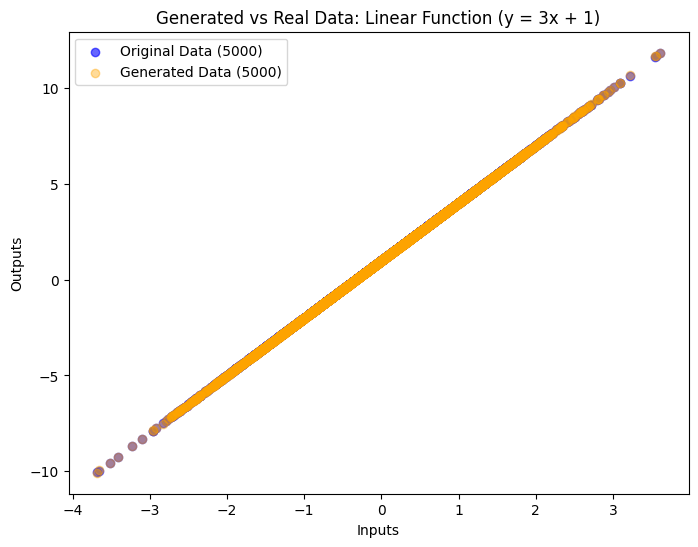

Epoch 0/10000, D Loss: 1.3816, G Loss: 0.7617
Epoch 1000/10000, D Loss: 1.0653, G Loss: 0.9943
Epoch 2000/10000, D Loss: 1.2859, G Loss: 0.7429
Epoch 3000/10000, D Loss: 1.3206, G Loss: 0.7688
Epoch 4000/10000, D Loss: 1.3385, G Loss: 0.7271
Epoch 5000/10000, D Loss: 1.3428, G Loss: 0.7442
Epoch 6000/10000, D Loss: 1.3573, G Loss: 0.7145
Epoch 7000/10000, D Loss: 1.3653, G Loss: 0.6997
Epoch 8000/10000, D Loss: 1.3703, G Loss: 0.7045
Epoch 9000/10000, D Loss: 1.3739, G Loss: 0.6902


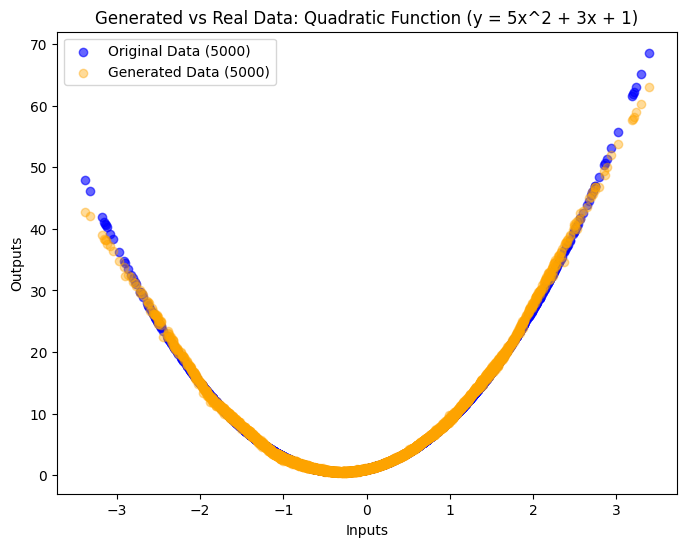

Epoch 0/25000, D Loss: 1.2246, G Loss: 0.6973
Epoch 1000/25000, D Loss: 1.1501, G Loss: 0.9648
Epoch 2000/25000, D Loss: 1.0695, G Loss: 1.0313
Epoch 3000/25000, D Loss: 1.1503, G Loss: 0.9626
Epoch 4000/25000, D Loss: 1.2478, G Loss: 0.8411
Epoch 5000/25000, D Loss: 1.2948, G Loss: 0.7552
Epoch 6000/25000, D Loss: 1.3008, G Loss: 0.7544
Epoch 7000/25000, D Loss: 1.3224, G Loss: 0.7581
Epoch 8000/25000, D Loss: 1.3461, G Loss: 0.7153
Epoch 9000/25000, D Loss: 1.3376, G Loss: 0.7587
Epoch 10000/25000, D Loss: 1.3555, G Loss: 0.7155
Epoch 11000/25000, D Loss: 1.3473, G Loss: 0.7435
Epoch 12000/25000, D Loss: 1.3547, G Loss: 0.7187
Epoch 13000/25000, D Loss: 1.3588, G Loss: 0.7010
Epoch 14000/25000, D Loss: 1.3643, G Loss: 0.7130
Epoch 15000/25000, D Loss: 1.3605, G Loss: 0.7064
Epoch 16000/25000, D Loss: 1.3744, G Loss: 0.7102
Epoch 17000/25000, D Loss: 1.3759, G Loss: 0.6908
Epoch 18000/25000, D Loss: 1.3726, G Loss: 0.6930
Epoch 19000/25000, D Loss: 1.3763, G Loss: 0.7073
Epoch 20000/2

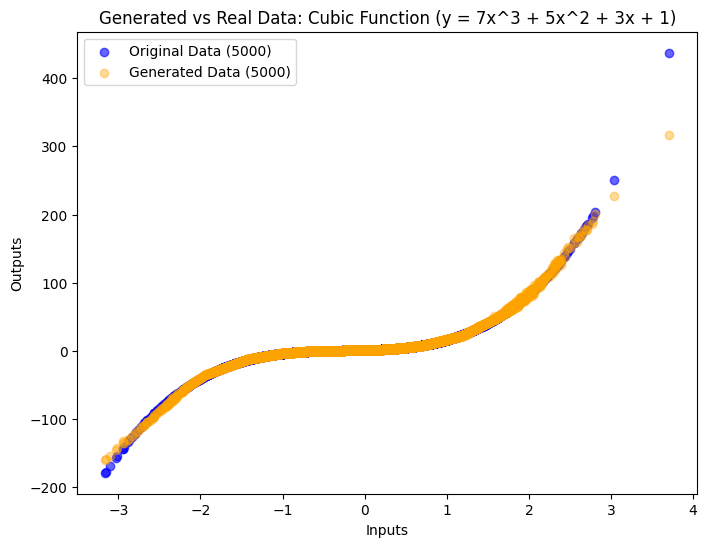

In [83]:
def plot_gan_results(generator, function, title, x_range=(-50, 50)):
    real_data = data_generation(function, batch_s=5000, x_range=x_range)
    x_real = real_data[:, 0].unsqueeze(1)
    z_fake = torch.randn(5000, 5)
    y_real = real_data[:, 1].numpy()
    y_fake = generator(z_fake, x_real).detach().numpy()

    plt.figure(figsize=(8, 6))
    plt.scatter(real_data[:, 0].numpy(), y_real, label="Original Data (5000)", color="blue", alpha=0.6)
    plt.scatter(real_data[:, 0].numpy(), y_fake, label="Generated Data (5000)", color="orange", alpha=0.4)
    plt.title(title)
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    plt.legend()
    plt.show()

# Step 1: Plot real data for all functions
plot_real_data(linear_function, "Real Data: Linear Function (y = 3x + 1)")
plot_real_data(quadratic_function, "Real Data: Quadratic Function (y = 5x^2 + 3x + 1)")
plot_real_data(cubic_function, "Real Data: Cubic Function (y = 7x^3 + 5x^2 + 3x + 1)")

# Step 2: Train GAN and plot results
latent_dim = 5

# Linear
linear_gen = Generator(latent_dim, 1, 1)
linear_disc = Discriminator(2)
train_gan(linear_gen, linear_disc, linear_function, epochs=10000)
plot_gan_results(linear_gen, linear_function, "Generated vs Real Data: Linear Function (y = 3x + 1)")

# Quadratic
quadratic_gen = Generator(latent_dim, 1, 1)
quadratic_disc = Discriminator(2)
train_gan(quadratic_gen, quadratic_disc, quadratic_function, epochs=10000)
plot_gan_results(quadratic_gen, quadratic_function, "Generated vs Real Data: Quadratic Function (y = 5x^2 + 3x + 1)")

# Cubic
cubic_gen = Generator(latent_dim, 1, 1)
cubic_disc = Discriminator(2)
train_gan(cubic_gen, cubic_disc, cubic_function, epochs=25000)
plot_gan_results(cubic_gen, cubic_function, "Generated vs Real Data: Cubic Function (y = 7x^3 + 5x^2 + 3x + 1)")
